In [1]:
%matplotlib inline

# Read training set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def rank_normalizer(X):
    return(X.rank(axis=1)/X.shape[1])
def normalize(img, dark_spectrum, white_spectrum):
    norm_c_img = (img - dark_spectrum)/(white_spectrum - dark_spectrum)
    norm_c_img = np.clip(norm_c_img,a_max=1,a_min=0)
    return norm_c_img

In [4]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])
X = rank_normalizer(X)

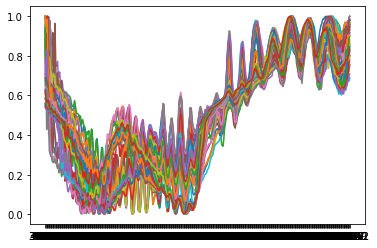

In [5]:
_=plt.plot(X.T)

In [6]:
pucerons_feuilles = X[X.index.get_level_values(0)]
pucerons_non_feuilles = X[X.index.get_level_values(0) == 0]

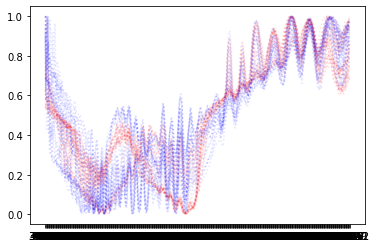

In [7]:
_ = plt.plot(pucerons_feuilles.T,'r:',alpha=0.1)
_ = plt.plot(pucerons_non_feuilles.T,'b:',alpha=0.1)

In [8]:
from sklearn.svm import OneClassSVM
svm_pf = OneClassSVM(gamma='auto')
svm_p = OneClassSVM(gamma='auto')

In [9]:
svm_pf.fit(pucerons_feuilles)
svm_p.fit(pucerons_non_feuilles)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

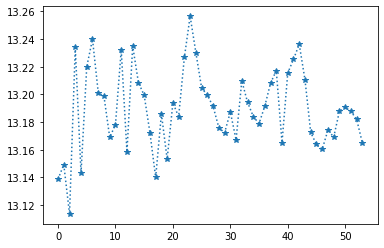

In [10]:
plt.plot(svm_p.score_samples(X),"*:")

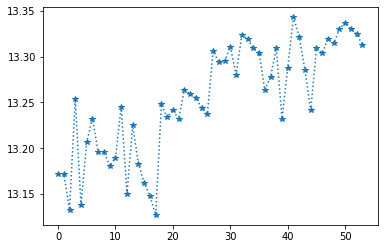

In [11]:
plt.plot(svm_pf.score_samples(X),"*:")

In [12]:
import pickle
pickle.dump(svm_pf,open("SVM_pf_rank.model","wb"))

In [13]:
pickle.dump(svm_p,open("SVM_p_rank.model","wb"))

In [14]:
pwd

'/Users/sergiopeignier/Desktop/INSA/BF2I_RESEARCH/GREEN SHIELD/06022020/train_models'